# <center>Лабораторная работа №2
## <center>Визуальный анализ данных о публикациях на Хабрахабре

**Заполните код в клетках.**

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [2]:
df = pd.read_csv('howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/company/alawar/blog/174571/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [10]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015 - ответ
* апрель 2015
* апрель 2016

In [11]:
df['mon_yr'] = [str(p)[:7] for p in df.published]
print(df.mon_yr.value_counts())
mon = df.mon_yr.value_counts().index[0]
print(mon)

2015-03    2189
2016-03    2115
2015-07    2111
2015-04    2110
2015-12    2084
2015-11    2035
2015-10    2030
2015-06    2004
2015-09    1944
2016-04    1910
2015-08    1849
2016-02    1819
2015-05    1799
2015-02    1793
2016-05    1726
2016-01    1717
2014-12    1694
2014-10    1595
2015-01    1504
2016-06    1498
2016-10    1493
2016-09    1482
2014-11    1462
2013-10    1456
2013-11    1452
2011-06    1439
2012-11    1435
2012-10    1421
2012-03    1416
2014-09    1408
           ... 
2011-02    1072
2010-04    1068
2010-12    1055
2009-12    1049
2010-08    1029
2009-10    1021
2010-05    1012
2010-01    1010
2010-11     990
2009-08     956
2009-09     955
2008-09     914
2009-07     891
2009-03     890
2009-04     840
2009-02     812
2008-12     798
2009-01     797
2009-05     755
2009-06     733
2008-10     712
2008-08     677
2008-07     674
2008-11     661
2008-05     635
2008-06     599
2008-04     597
2008-03     545
2008-02     496
2008-01     435
Name: mon_yr, Length: 10

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей - ответ

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

C:\Users\Phobia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


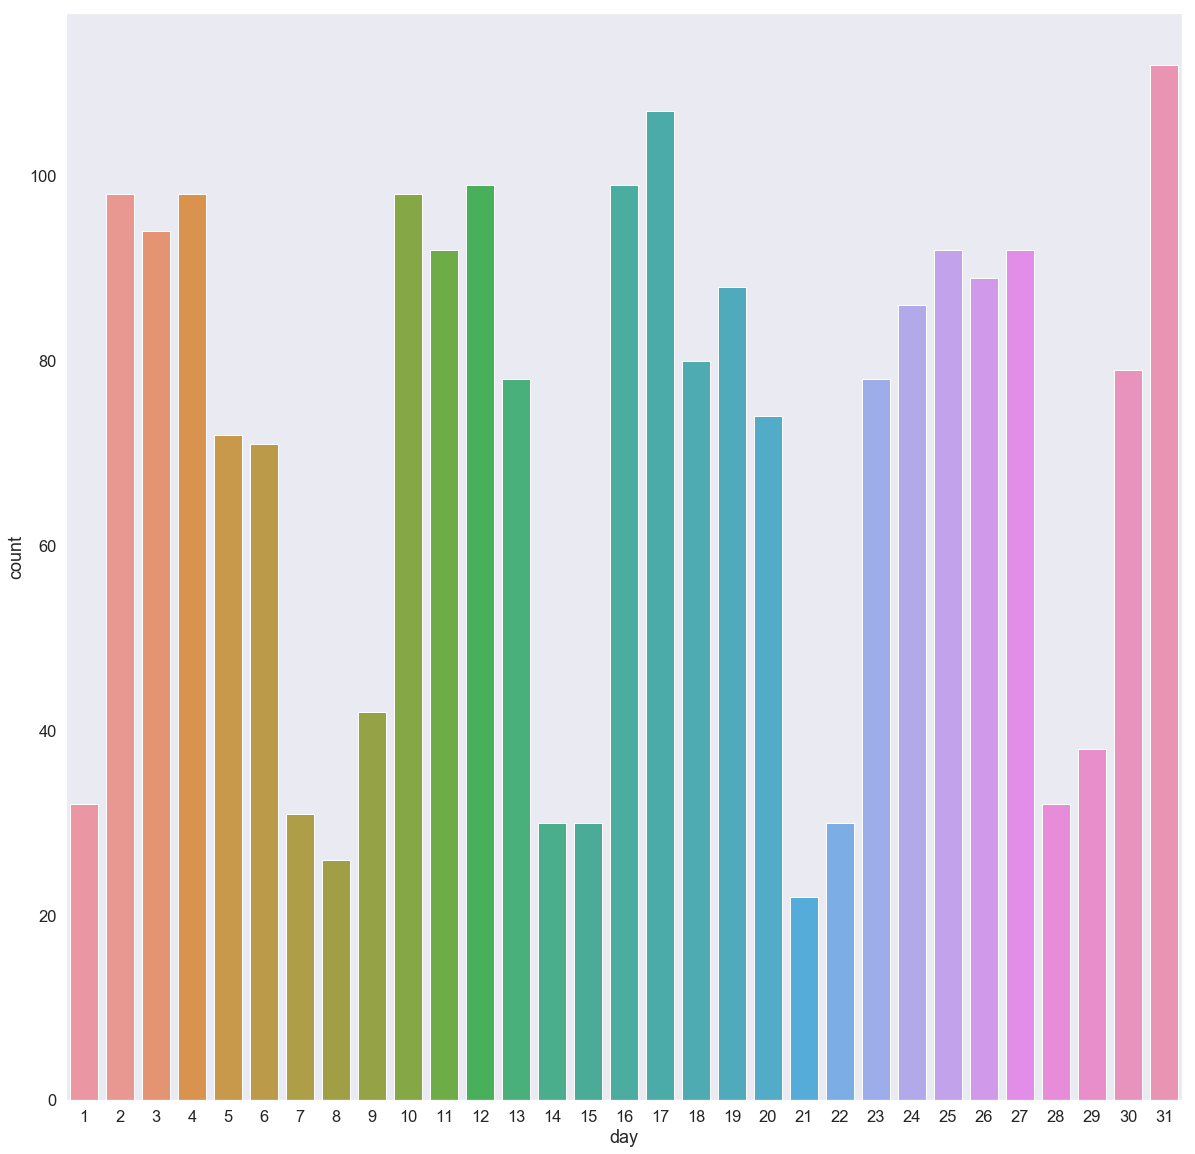

In [12]:
df_mon = df[df.mon_yr == mon]
df_mon['day'] = [p.day for p in df_mon.published]
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
sns.countplot(x = 'day', data = df_mon);

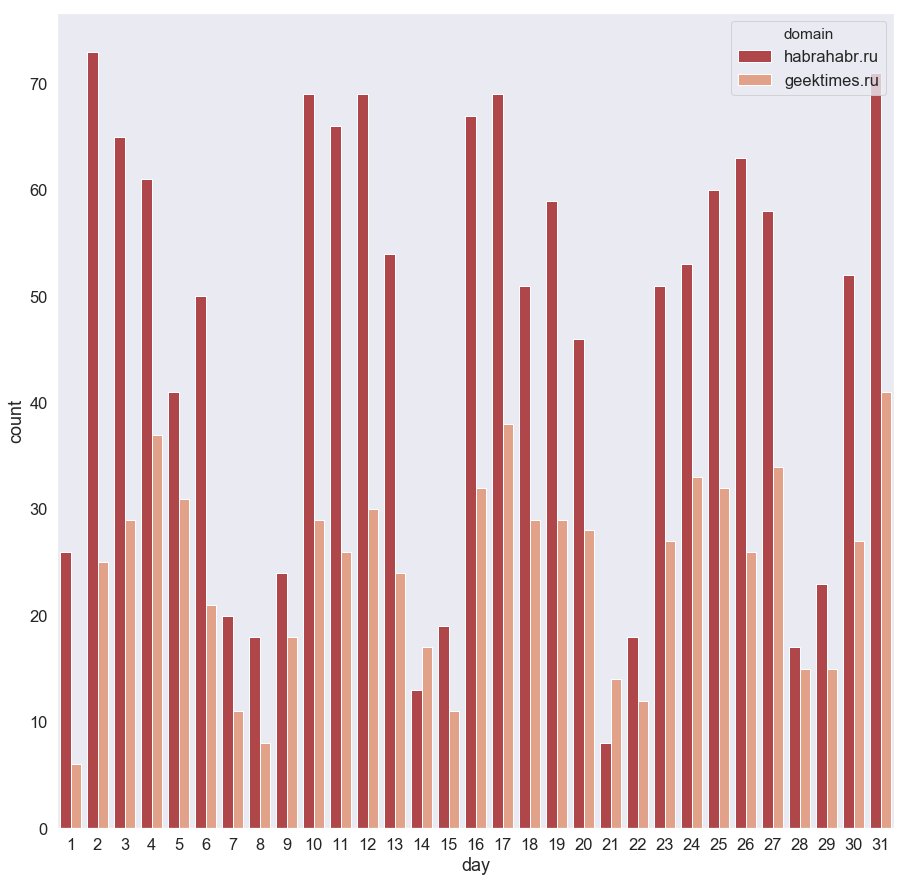

In [13]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,1,1)
sns.countplot(x = 'day', hue = 'domain', data = df_mon);

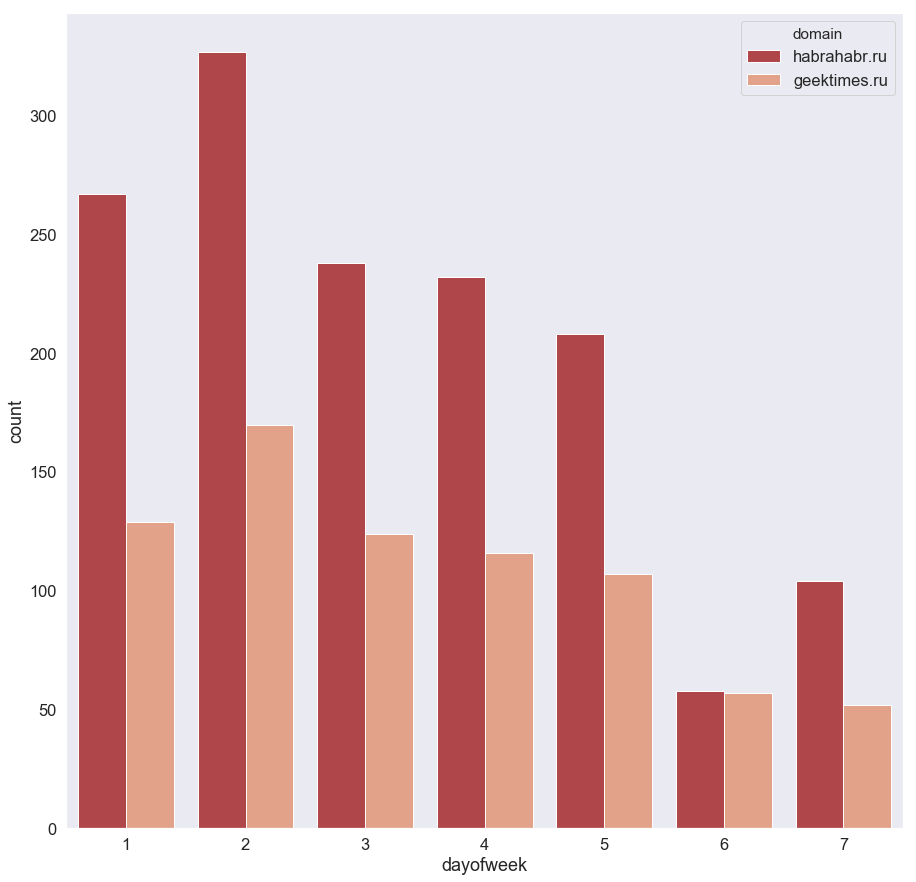

In [14]:
fig = plt.figure(figsize=(15,15))
fig.add_subplot(1,1,1)
sns.countplot(x = 'dayofweek', hue = 'domain', data = df_mon);

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - ответ
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

In [15]:
print(df.groupby('hour')['views'].mean().sort_values(ascending=False)[:5])

hour
6     21354.310115
4     20678.389091
7     19093.953408
3     18370.017972
22    18365.387460
Name: views, dtype: float64


In [16]:
print(df.groupby('hour')['comments'].mean().sort_values(ascending=False)[:5])

hour
4    53.657273
3    53.123877
6    51.799618
1    49.417910
2    48.827025
Name: comments, dtype: float64


In [17]:
print(df[df.domain == 'habrahabr.ru'].groupby('hour')['comments'].mean().sort_values(ascending=False)[:5])

hour
4    49.458931
3    47.077419
6    45.240299
1    45.103399
2    44.959740
Name: comments, dtype: float64


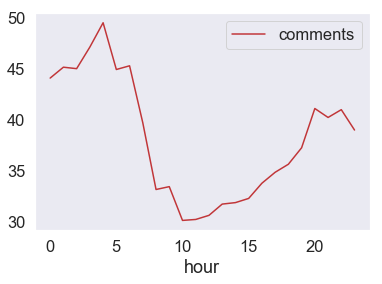

In [18]:
df[df.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot();

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj - ответ
* @Mithgol
* @alizar
* @ilya42

In [19]:
df[df.author.isin(['@Mordatyj','@Mithgol', '@alizar', '@ilya42'])].groupby('author')[['votes_minus']].mean().sort_values('votes_minus', ascending = False)

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?
Ответ: нет

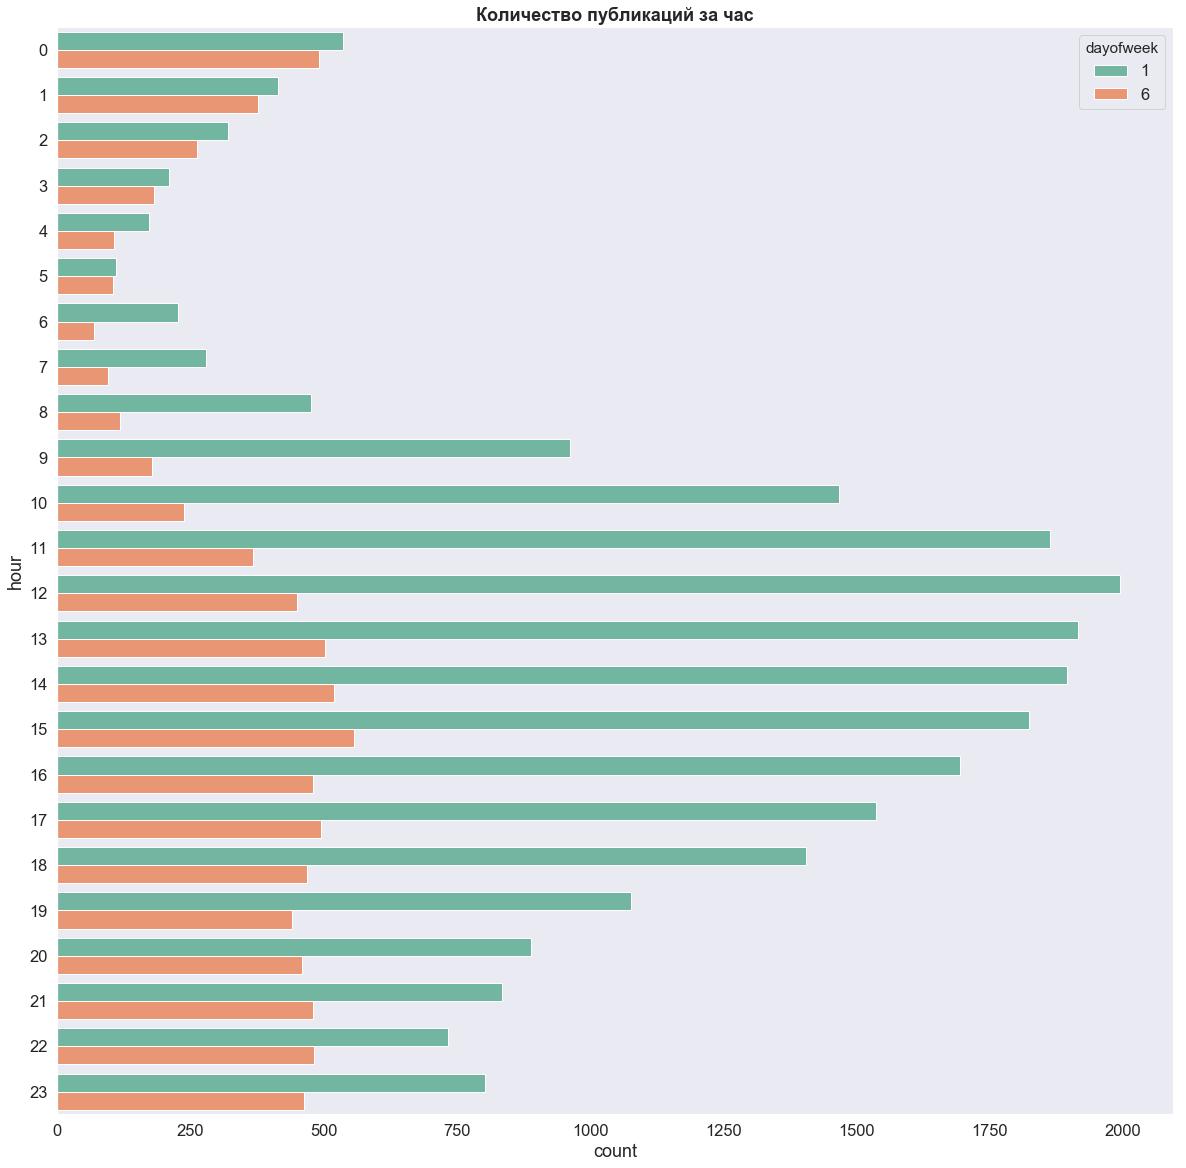

In [20]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)
pl = sns.countplot(y = 'hour', hue = 'dayofweek', data = df[df.dayofweek.isin([1, 6])], palette="Set2");
pl.set_title("Количество публикаций за час", fontweight = 'bold');